In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as sm
import warnings
import missingno as msno 

import os

In [2]:
data = pd.read_excel('../Datos/2. Participants attributes.xlsx', sheet_name='IsBaru_Consolidado')  
#data

In [3]:
# Q11.39 ¿Do you understand what is sexual intercourse?
Q00 = 'Q11.39'

# Q11.40 ¿Have you had sexual intercourse?
Q0 = 'Q11.40'

# Q11.53 Do you think you are going to have sex with someone in the next year?
Q1 = 'Q11.53'

# Q11.41 ¿How old were you when you had your first sexual intercourse?
Q2 = 'Q11.41'

# Q11.42 The first time you had sex, did you or your partner do anything to prevent pregnancy?
Q3 = 'Q11.42'

# Q11.44 The first time you had sex, was it under the influence of alcohol or drugs?
Q4 = 'Q11.44'

# Q11.45 Have you had sex with your partner?
Q5 = 'Q11.45'

# Q11.46 Do you feel that having sex with your partner allows you to have a closer relationship between the two?
Q6 = 'Q11.46'

# Q11.47 Some people worry about sexually transmitted infections. How concerned were/are you , about getting a sexually transmitted disease by your partner?
Q7 = 'Q11.47'

# Q11.48 Some people worry about unwanted pregnancies. How concerned were/are you , about getting pregnant with your partner?
Q8 = 'Q11.48'

# Q11.11 ¿What is your partnership estatus?
Q9 = 'Q11.11'

# Q11.49 Are you or your partner doing something to avoid pregnancy?
Q10 = 'Q11.49'

preguntas_comp = [Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]

preguntas_base_df = data[['ID', 'Q3.11', 'Q3.5', Q00, Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10]]
#preguntas_base_df

In [4]:
preguntas_base_df.columns = ['ID', 'Sex', 'Age', 'Understand', 'Had sex', 'Sex within a year', 'Age sex', 'Pregnancy prevention', 'Sex under the influence', 
                             'Sex with partner', 'Sex stregthen relationship', 'STD preocupation', 'Pregnancy preocupation', 'Partner status',
                            'Avoid pregnancy']

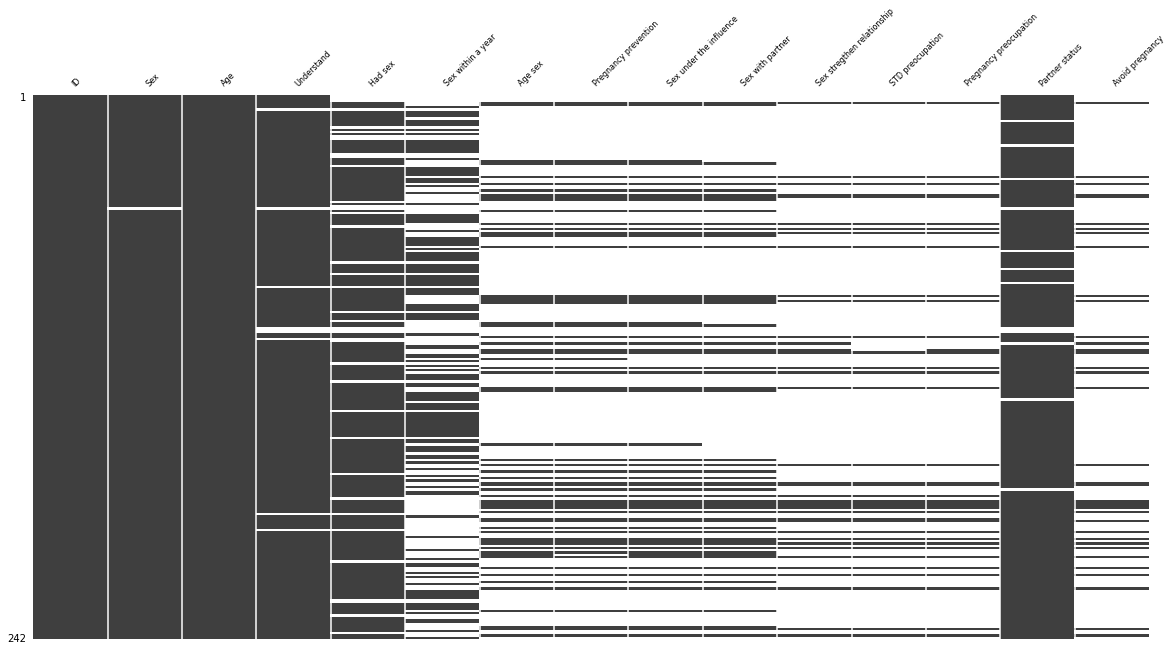

In [5]:
lo = msno.matrix(preguntas_base_df,figsize=(20,10), fontsize=8, sparkline=False)

In [6]:
print(preguntas_base_df.isnull().sum())
print(preguntas_base_df.isnull().sum()/preguntas_base_df.shape[0]*100)

ID                              0
Sex                             1
Age                             0
Understand                      9
Had sex                        39
Sex within a year             119
Age sex                       178
Pregnancy prevention          179
Sex under the influence       179
Sex with partner              182
Sex stregthen relationship    203
STD preocupation              205
Pregnancy preocupation        204
Partner status                 13
Avoid pregnancy               205
dtype: int64
ID                             0.000000
Sex                            0.413223
Age                            0.000000
Understand                     3.719008
Had sex                       16.115702
Sex within a year             49.173554
Age sex                       73.553719
Pregnancy prevention          73.966942
Sex under the influence       73.966942
Sex with partner              75.206612
Sex stregthen relationship    83.884298
STD preocupation              84.7107

In [7]:
def replace_na_smart(base, column, value, fill_value, is_na):
    if is_na:
        base.loc[base[column].isnull(), column:] = base.loc[base[column].isnull(), column:].fillna(fill_value)
    else:
        base.loc[base[column].isin(value), column:] = base.loc[base[column].isin(value), column:].fillna(fill_value)
    return(base)

In [8]:
preguntas = [['Understand', [2.0], -1, False],
             ['Understand', [2.0], -2, True],
             ['Had sex', [2.0], -3, False],
             ['Had sex', [2.0], -2, True],
             ['Had sex', [3.0, 4.0, 5.0], -4, False],
             ['Sex with partner', [2.0], -5, False],
             ['Sex with partner', [3.0, 4.0, 5.0], -6, False],
             ['Sex with partner', [2.0], -2, True], 
             ['Partner status', [7.0, 8.0, 9.0, 10.0, 11.0], -7, False],
             ['Partner status', [7.0, 8.0, 9.0, 10.0, 11.0], -2, True]]

In [9]:
for i, element in enumerate(preguntas):
    #print(i, element)
    aux = replace_na_smart(preguntas_base_df, element[0], element[1], element[2], element[3])

/Users/isabellarodas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [10]:
(aux == preguntas_base_df).sum()

ID                            242
Sex                           241
Age                           242
Understand                    242
Had sex                       242
Sex within a year             178
Age sex                       242
Pregnancy prevention          241
Sex under the influence       241
Sex with partner              242
Sex stregthen relationship    242
STD preocupation              240
Pregnancy preocupation        241
Partner status                242
Avoid pregnancy               240
dtype: int64

In [11]:
aux

,ID,Sex,Age,Understand,Had sex,Sex within a year,Age sex,Pregnancy prevention,Sex under the influence,Sex with partner,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Partner status,Avoid pregnancy
0,i1,2.0,2,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.0,-1.0
1,i2,1.0,3,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.0,-1.0
2,i3,2.0,1,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,-1.0
3,i4,1.0,2,1.0,1.0,NaN,5.0,2.0,4.0,1.0,1.0,4.0,4.0,4.0,1.0
4,i5,2.0,1,1.0,1.0,NaN,5.0,3.0,1.0,4.0,-6.0,-6.0,-6.0,10.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,1.0,5,1.0,1.0,NaN,6.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0
238,i239,2.0,3,1.0,2.0,6.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,10.0,-3.0
239,i240,2.0,4,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0
240,i241,1.0,4,1.0,1.0,NaN,6.0,1.0,2.0,1.0,1.0,2.0,2.0,6.0,1.0


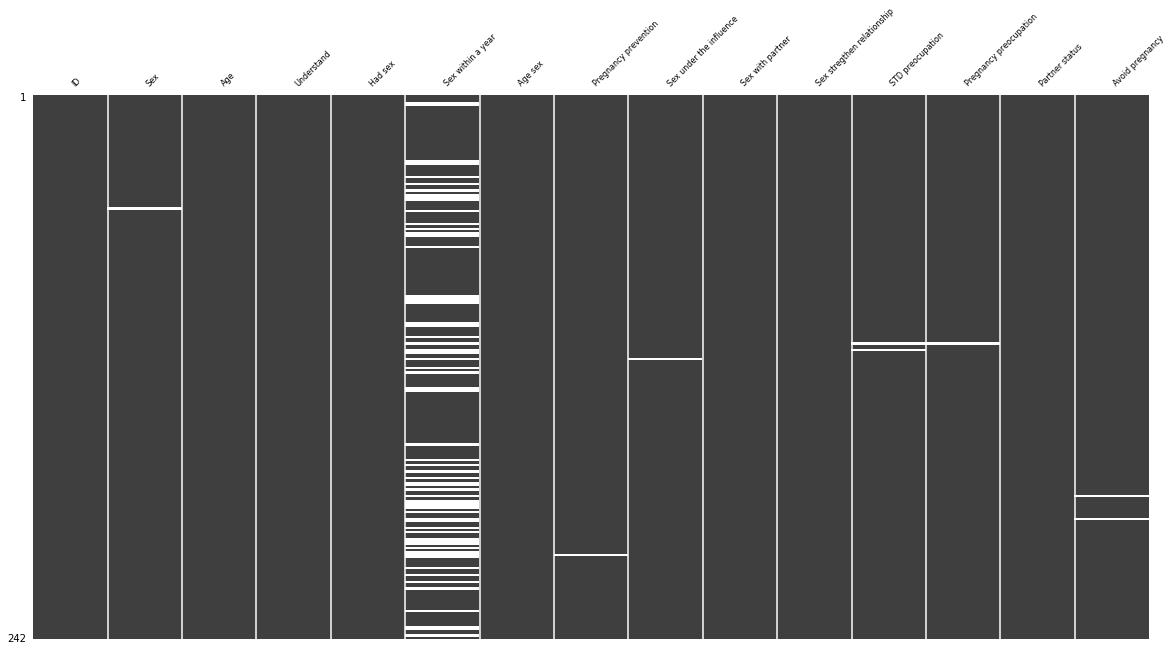

In [12]:
lo = msno.matrix(aux,figsize=(20,10), fontsize=8, sparkline=False)

In [13]:
aux.columns

Index(['ID', 'Sex', 'Age', 'Understand', 'Had sex', 'Sex within a year',
       'Age sex', 'Pregnancy prevention', 'Sex under the influence',
       'Sex with partner', 'Sex stregthen relationship', 'STD preocupation',
       'Pregnancy preocupation', 'Partner status', 'Avoid pregnancy'],
      dtype='object')

In [14]:
for i in aux.columns:
    print(i)
    print(aux[i].value_counts())
    print('-'*20)

ID
i1      1
i182    1
i154    1
i155    1
i156    1
       ..
i86     1
i87     1
i88     1
i89     1
i242    1
Name: ID, Length: 242, dtype: int64
--------------------
Sex
2.0    120
1.0    118
3.0      3
Name: Sex, dtype: int64
--------------------
Age
2    65
3    58
4    46
1    45
5    28
Name: Age, dtype: int64
--------------------
Understand
 1.0    208
 2.0     25
-2.0      9
Name: Understand, dtype: int64
--------------------
Had sex
 2.0    124
 1.0     64
-1.0     25
-2.0     14
 5.0     13
 3.0      2
Name: Had sex, dtype: int64
--------------------
Sex within a year
 4.0    43
 6.0    30
-1.0    25
 3.0    23
-4.0    15
-2.0    14
 7.0    14
 1.0     7
 2.0     5
 5.0     1
-3.0     1
Name: Sex within a year, dtype: int64
--------------------
Age sex
-3.0    124
 6.0     28
-1.0     25
-4.0     15
-2.0     14
 5.0     11
 4.0      7
 2.0      6
 7.0      4
 8.0      3
 3.0      3
 1.0      2
Name: Age sex, dtype: int64
--------------------
Pregnancy prevention
-3.0    124

In [15]:
aux.loc[aux.Understand == -2, 'Understand'] = 2.0 

/Users/isabellarodas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
aux.loc[~aux['Had sex'].isin([1,2]), 'Had sex'] = 3.0 

In [17]:
col = 'Sex within a year'
aux.loc[(aux[col] > 0) & (aux[col] < 4), col] = 1.0
aux.loc[aux[col].isin([4,5]), col] = 2.0
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [18]:
col = 'Age sex'
aux.loc[(aux[col] < 0) | (aux[col] > 7.0), col] = 7.0

In [19]:
col = 'Pregnancy prevention'
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [20]:
col = 'Sex under the influence'
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [21]:
col = 'Sex with partner'
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [22]:
col = 'Sex stregthen relationship'
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [23]:
col = 'STD preocupation'
aux.loc[(aux[col] > 0) & (aux[col] < 3), col] = 1.0
aux.loc[(aux[col] > 2) & (aux[col] < 5), col] = 2.0
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [24]:
col = 'Pregnancy preocupation'
aux.loc[(aux[col] > 0) & (aux[col] < 3), col] = 1.0
aux.loc[(aux[col] > 2) & (aux[col] < 5), col] = 2.0
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [25]:
col = 'Partner status'
aux.loc[(aux[col] > 0) & (aux[col] < 7), col] = 1.0
aux.loc[(aux[col] > 6) & (aux[col] < 9), col] = 2.0
aux.loc[~aux[col].isin([1,2]), col] = 3.0

In [26]:
col = 'Avoid pregnancy'
aux.loc[~aux[col].isin([1,2]), col] = 3.0

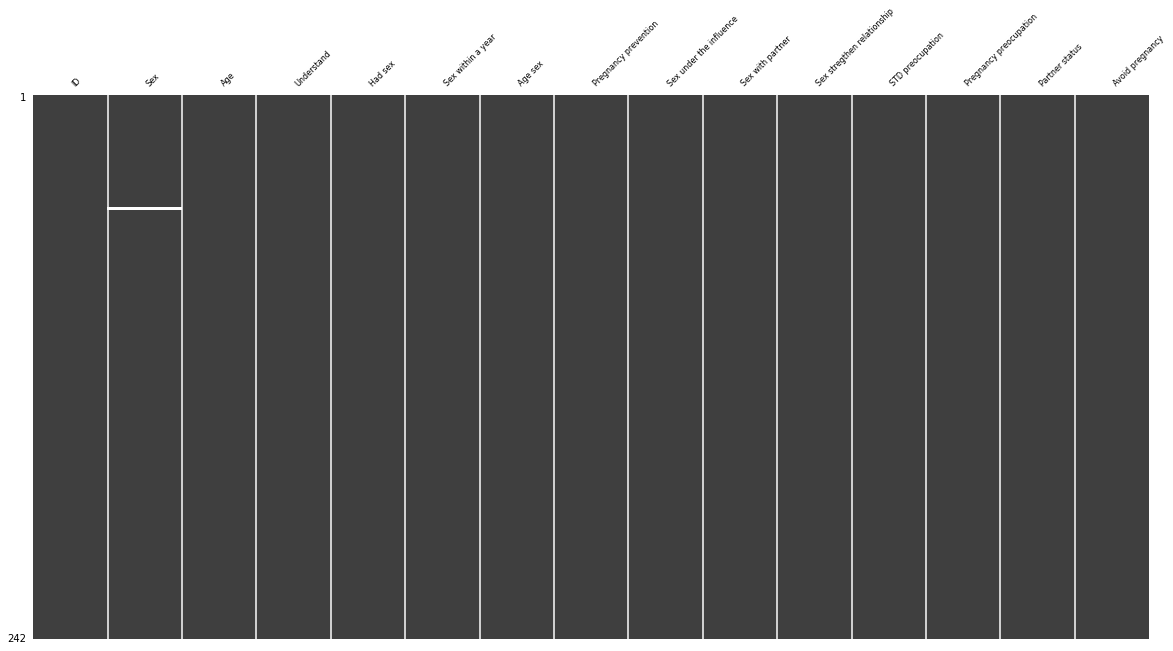

In [27]:
lo = msno.matrix(aux,figsize=(20,10), fontsize=8, sparkline=False)

In [28]:
# Imputar los datos que me quedan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(preguntas_base_df[~preguntas_base_df.iloc[:,1:].isnull().any(axis = 1)].iloc[:,1:])
IterativeImputer(random_state=0)
X_test = preguntas_base_df[preguntas_base_df.iloc[:,1:].isnull().any(axis = 1)].iloc[:,1:]

# the model learns that the second feature is double the first
data_imp = np.round(imp.transform(X_test))

In [29]:
data_imp

array([[2., 3., 2., 3., 3., 7., 3., 3., 3., 3., 3., 3., 3., 3.]])

In [30]:
index_imp = preguntas_base_df[preguntas_base_df.iloc[:,1:].isnull().any(axis = 1)].index

In [31]:
preguntas_base_df.iloc[index_imp, 1:] = data_imp
preguntas_base_df

/Users/isabellarodas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,ID,Sex,Age,Understand,Had sex,Sex within a year,Age sex,Pregnancy prevention,Sex under the influence,Sex with partner,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Partner status,Avoid pregnancy
0,i1,2.0,2.0,2.0,3.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,i2,1.0,3.0,2.0,3.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,i3,2.0,1.0,2.0,3.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,i4,1.0,2.0,1.0,1.0,3.0,5.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0
4,i5,2.0,1.0,1.0,1.0,3.0,5.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,i238,1.0,5.0,1.0,1.0,3.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
238,i239,2.0,3.0,1.0,2.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
239,i240,2.0,4.0,2.0,3.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0
240,i241,1.0,4.0,1.0,1.0,3.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


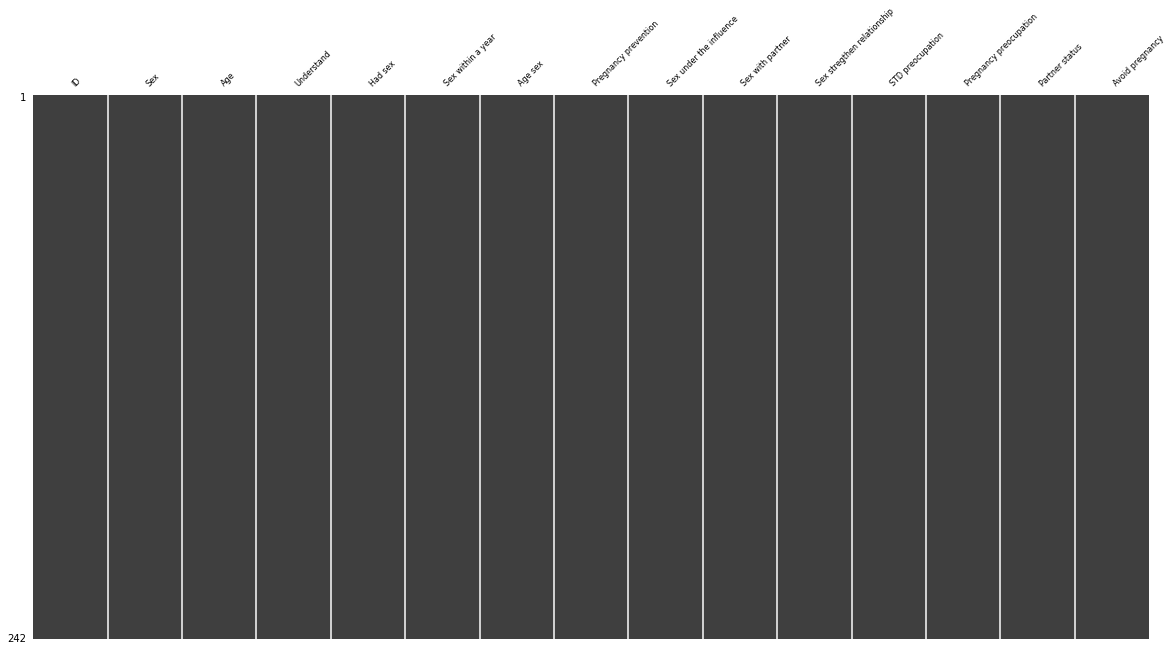

In [32]:
lo = msno.matrix(preguntas_base_df,figsize=(20,10), fontsize=8, sparkline=False)

In [33]:
preguntas_base_df.to_csv('../Datos/1_Preprocess/datos_preprocesados_lca.csv')

In [ ]:
# Se utilizo R para hacer el LCA

## Devolver la información a Python

In [35]:
grupos = pd.read_csv('../Datos/1_Preprocess/data_clustered.csv')
grupos

,...1,ID,Sex,Age,Understand,Had sex,Sex within a year,Age sex,Pregnancy prevention,Sex under the influence,...,Sex stregthen relationship,STD preocupation,Pregnancy preocupation,Partner status,Avoid pregnancy,Class_LCA,1,2,3,4
0,0,i1,2,2,2,3,3,7,3,3,...,3,3,3,3,3,4,1.154012e-215,0.0,0.000000e+00,1.000000e+00
1,1,i2,1,3,2,3,3,7,3,3,...,3,3,3,3,3,4,6.462465e-216,0.0,0.000000e+00,1.000000e+00
2,2,i3,2,1,2,3,3,7,3,3,...,3,3,3,3,3,4,1.154012e-215,0.0,0.000000e+00,1.000000e+00
3,3,i4,1,2,1,1,3,5,2,3,...,1,2,2,1,1,2,0.000000e+00,1.0,5.006789e-157,0.000000e+00
4,4,i5,2,1,1,1,3,5,3,1,...,3,3,3,3,3,3,0.000000e+00,0.0,1.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,i238,1,5,1,1,3,6,1,2,...,1,1,1,1,1,2,0.000000e+00,1.0,3.584858e-147,0.000000e+00
238,238,i239,2,3,1,2,3,7,3,3,...,3,3,3,3,3,1,1.000000e+00,0.0,1.383404e-82,5.626309e-13
239,239,i240,2,4,2,3,3,7,3,3,...,3,3,3,1,3,4,1.769179e-215,0.0,0.000000e+00,1.000000e+00
240,240,i241,1,4,1,1,3,6,1,2,...,1,1,1,1,1,2,0.000000e+00,1.0,3.584858e-147,0.000000e+00


In [42]:
pregs_x = pd.read_excel('../Datos/0_raw/2. Participants attributes-Isabella’s MacBook Pro.xlsx', sheet_name='Preguntas_Predictoras', header = None)
pregs_x.columns = ['ID_preg', 'Text_preg', 'Answer_text', 'Answer_code']
pregs_x.fillna(method='ffill', inplace=True)
pregs_x

,ID_preg,Text_preg,Answer_text,Answer_code
0,Q3.3,Your course:,Sixth grade (6),1.0
1,Q3.3,Your course:,Seventh grade (7),2.0
2,Q3.3,Your course:,Eighth grade (8),3.0
3,Q3.3,Your course:,Ninth grade (9),4.0
4,Q3.3,Your course:,Tenth grade (10),5.0
...,...,...,...,...
558,Q14.18_2,¿Cuál es tu ambiente social para fumar o tomar...,Con amigos,1.0
559,Q14.18_3,¿Cuál es tu ambiente social para fumar o tomar...,Con familiares,1.0
560,Q14.18_4,¿Cuál es tu ambiente social para fumar o tomar...,En la playa,1.0
561,Q14.18_5,¿Cuál es tu ambiente social para fumar o tomar...,En las fiestas,1.0


In [43]:
preguntas_predictoras = pregs_x.ID_preg.unique()
preguntas_predictoras

array(['Q3.3', 'Q3.5', 'Q3.7', 'Q3.8', 'Q3.9', 'Q3.10', 'Q3.11', 'Q3.12',
       'Q3.13', 'Q3.14', 'Q3.15', 'Q3.21', 'Q9.6', 'Q9.7', 'Q9.8',
       'Q9.9_1', 'Q9.9_2', 'Q9.9_3', 'Q9.9_4', 'Q9.9_5', 'Q9.9_6',
       'Q9.9_7', 'Q9.9_8', 'Q9.9_9', 'Q9.10', 'Q9.11_2', 'Q9.11_4',
       'Q10.9_2', 'Q10.9_3', 'Q11.2_1', 'Q11.2_2', 'Q11.3', 'Q11.4_1',
       'Q11.4_2', 'Q11.4_3', 'Q11.4_4', 'Q11.4_5', 'Q11.4_6', 'Q11.4_7',
       'Q11.5', 'Q11.6', 'Q11.7', 'Q11.8', 'Q11.9', 'Q11.10', 'Q11.12',
       'Q11.13', 'Q11.14', 'Q11.15', 'Q11.16_1', 'Q11.16_2', 'Q11.16_3',
       'Q11.16_4', 'Q11.16_5', 'Q11.16_6', 'Q11.16_7', 'Q11.17_1',
       'Q11.17_2', 'Q11.17_3', 'Q11.17_4', 'Q11.17_5', 'Q11.17_6',
       'Q11.17_7', 'Q11.17_8', 'Q11.18_1', 'Q11.18_2', 'Q11.18_3',
       'Q11.18_4', 'Q11.18_5', 'Q11.19_1', 'Q11.19_2', 'Q11.19_3',
       'Q11.19_4', 'Q11.19_5', 'Q11.21', 'Q11.22', 'Q11.23', 'Q11.25',
       'Q11.26', 'Q11.27', 'Q11.28', 'Q11.29', 'Q11.30', 'Q11.31',
       'Q11.32', 'Q11.33', 'Q

In [64]:
len(preguntas_predictoras)

119

In [65]:
data_pred = data[preguntas_predictoras]

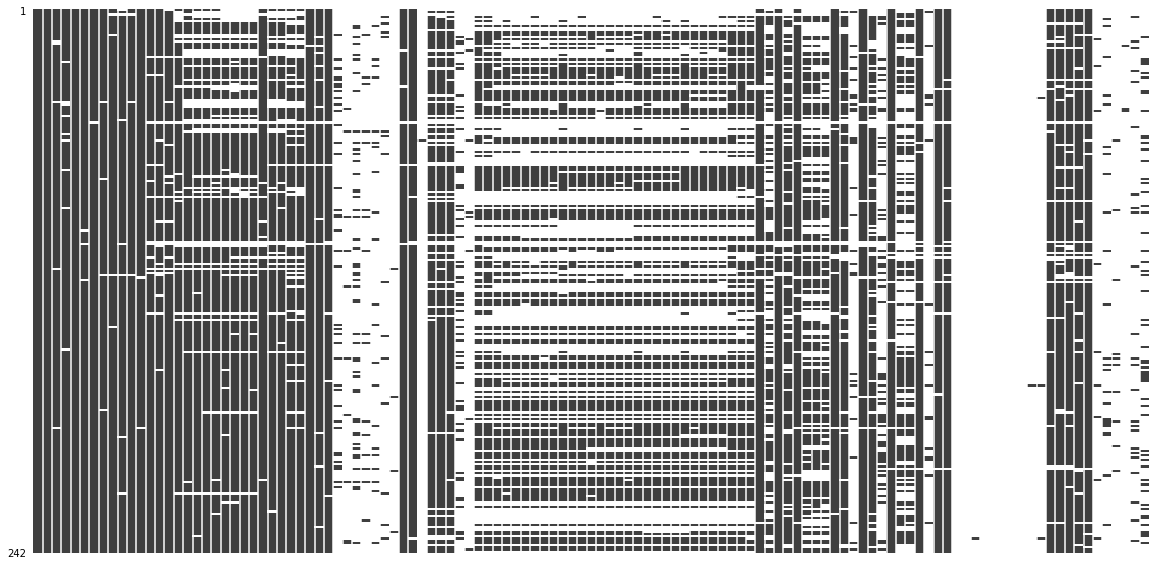

In [66]:
lo = msno.matrix(data[preguntas_predictoras],figsize=(20,10), fontsize=8, sparkline=False)


In [67]:
data[preguntas_predictoras].isnull().sum()
#.describe

Q3.3          0
Q3.5          0
Q3.7          5
Q3.8          9
Q3.9          0
           ... 
Q14.18_2    218
Q14.18_3    232
Q14.18_4    239
Q14.18_5    218
Q14.18_6    187
Length: 119, dtype: int64

<AxesSubplot:>

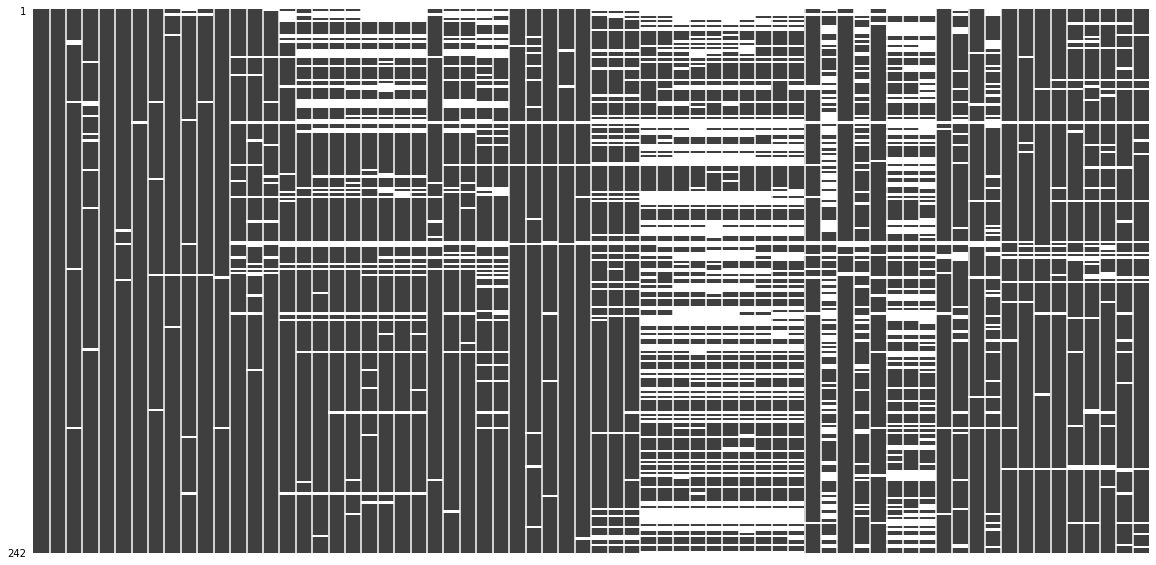

In [68]:
data_pred = data[preguntas_predictoras].dropna(thresh=len(data[preguntas_predictoras])/ 2, axis=1)
msno.matrix(data_pred,figsize=(20,10), fontsize=8, sparkline=False)

In [69]:
data_pred.columns

Index(['Q3.3', 'Q3.5', 'Q3.7', 'Q3.8', 'Q3.9', 'Q3.10', 'Q3.11', 'Q3.12',
       'Q3.13', 'Q3.14', 'Q3.15', 'Q3.21', 'Q9.6', 'Q9.7', 'Q9.8', 'Q9.9_1',
       'Q9.9_2', 'Q9.9_3', 'Q9.9_4', 'Q9.9_5', 'Q9.9_6', 'Q9.9_7', 'Q9.9_8',
       'Q9.9_9', 'Q9.10', 'Q9.11_2', 'Q9.11_4', 'Q10.9_2', 'Q10.9_3',
       'Q11.2_1', 'Q11.2_2', 'Q11.3', 'Q11.5', 'Q11.6', 'Q11.8', 'Q11.9',
       'Q11.10', 'Q11.14', 'Q11.15', 'Q11.16_1', 'Q11.16_2', 'Q11.17_1',
       'Q11.18_1', 'Q11.19_1', 'Q11.21', 'Q11.22', 'Q11.23', 'Q11.25',
       'Q11.26', 'Q11.27', 'Q11.28', 'Q11.29', 'Q11.30', 'Q11.31', 'Q11.32',
       'Q11.33', 'Q11.34', 'Q11.36', 'Q11.37', 'Q14.2', 'Q14.5', 'Q14.7',
       'Q14.8', 'Q14.13', 'Q14.14', 'Q14.15', 'Q14.16', 'Q14.17'],
      dtype='object')

In [72]:
pregs_x.groupby(['ID_preg'])['Answer_text'].size()

ID_preg
Q10.9_2    3
Q10.9_3    3
Q11.10     4
Q11.12     4
Q11.13     4
          ..
Q9.9_5     4
Q9.9_6     4
Q9.9_7     4
Q9.9_8     4
Q9.9_9     4
Name: Answer_text, Length: 119, dtype: int64

In [73]:
pregs_x['Answer_text'].unique()

array(['Sixth grade (6)', 'Seventh grade (7)', 'Eighth grade (8)',
       'Ninth grade (9)', 'Tenth grade (10)', 'Eleven degree (11)', '13',
       '14', 15, '16', '17', 'Blanco', 'Indigena', 'Rom', 'Raizal ',
       'Palenquero',
       'Negro (a), mulatto (a), Afro-Colombiano (a) or afro-descendiente',
       'Otro', 'Yes', 'Do not', 'Man', 'Woman', 'Other Which?',
       'Primary without completing', 'Primary completed',
       "Bachelor's degree without completing", 'Bachelor (graduated)',
       'Higher non-university studies (technician, technologist ...)',
       'Professional graduate of the university',
       'Postgraduate studies (after graduating from college)', 'No se',
       'You passed all the subjects',
       'You did not pass one or two subjects',
       'You did not pass 3 or more classes', 'Yes, more than once',
       'Yes, once', 'I dont know', 'one', 'two',
       'I do not live with my parents',
       'I do not want to answer this question', 'Sí, frecuentement

In [80]:
pregs_x[pregs_x['Answer_text'].isin(['Otro', 'Others', 'No se', 'I dont know', 'Me niego a contestar'
                                             , 'No lo sé', 'No sé', 
                                            'Me niego a responder',
                                    'No, no entiendo', '• Me niego a contestar',
                                    '• Me niego a contestar → Saltar a MIII8a', 
                                     'I do not understand the question'])].groupby('ID_preg').first('Answer_code')
#.apply(lambda x: x[(x['col-c']=='22222') & (x['col-b'].between('07:00:00', '09:00:00')) & (x['col-c']=='99999').any()])






,Answer_code
ID_preg,
Q10.9_2,3.0
Q10.9_3,3.0
Q11.10,3.0
Q11.12,3.0
Q11.13,3.0
...,...
Q9.9_5,3.0
Q9.9_6,3.0
Q9.9_7,3.0
